In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

df1 = pd.read_csv("https://raw.githubusercontent.com/sdrangan/introml/97d48c997a04eb4b45a37bb38d03b6a313eb0ce8/mult_lin_reg/exp1.csv"\
                  , names=names, index_col=0)
df2 = pd.read_csv("https://raw.githubusercontent.com/sdrangan/introml/97d48c997a04eb4b45a37bb38d03b6a313eb0ce8/mult_lin_reg/exp2.csv"\
                  , names=names, index_col=0)

In [3]:
print df1.head(6)

            q1      q2      q3           dq1            dq2           dq3  \
t                                                                           
0.00 -0.000007  2.4958 -1.1345 -7.882100e-21 -4.940656e-321  3.913100e-29   
0.01 -0.000007  2.4958 -1.1345 -2.258200e-21 -4.940656e-321  2.626200e-31   
0.02 -0.000007  2.4958 -1.1345 -6.469800e-22 -4.940656e-321  1.762500e-33   
0.03 -0.000007  2.4958 -1.1345 -1.853600e-22 -4.940656e-321  1.182800e-35   
0.04 -0.000007  2.4958 -1.1345 -5.310600e-23 -4.940656e-321 -5.270900e-03   
0.05 -0.000007  2.4958 -1.1345 -1.521500e-23 -4.940656e-321  3.252600e-04   

            I1       I2       I3   eps21   eps22   eps31    eps32  \
t                                                                   
0.00 -0.081623 -0.40812 -0.30609 -269.25 -113.20  3.5918  1.57860   
0.01 -0.037411 -0.37241 -0.26698 -270.91 -116.05  1.4585 -1.73980   
0.02 -0.066319 -0.40302 -0.31459 -269.25 -112.97  3.5918  0.86753   
0.03 -0.068020 -0.43703 -0.28398 -269.

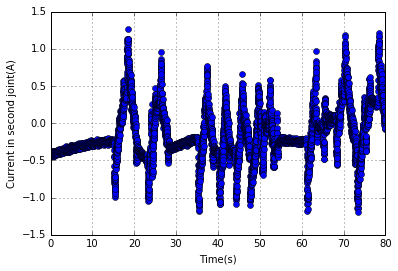

In [4]:
t = np.array(df1.index)
y = np.array(df1.I2)
plt.plot(t,y,"o")
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.grid(True)

In [5]:
ytrain = y
xtrain = df1[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

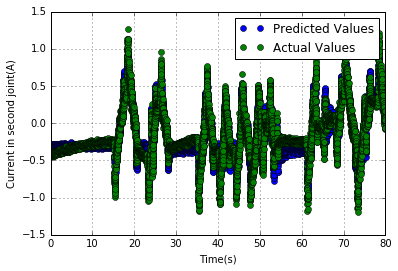

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)
test_val = df1[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
pred_val = regr.predict(test_val)
actual_val = df1.I2
plt.plot(t,pred_val,"o")
plt.plot(t,actual_val,"o")
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.legend(['Predicted Values','Actual Values'])
plt.grid(True)

In [7]:
RSS_train = np.mean(((pred_val-actual_val)**2)/(np.std(actual_val)**2))
print RSS_train

0.0958326386123


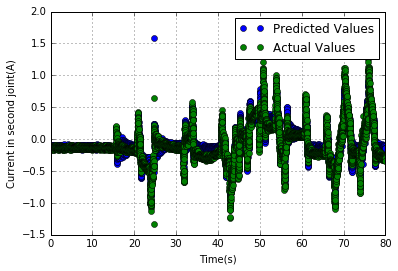

In [8]:
test_val = df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
pred_val = regr.predict(test_val)
actual_val = df2.I2
plt.plot(t,pred_val,"o")
plt.plot(t,actual_val,"o")
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.legend(['Predicted Values','Actual Values'])
plt.grid(True)

In [9]:
RSS_train = np.mean(((pred_val-actual_val)**2)/(np.std(actual_val)**2))
print RSS_train

0.126780488048
